# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_weather_df = "../output_data/weather_df.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Counters
city_counter = 1
set_counter = 1

# Create the lists to hold relative data
cities_list= []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Print Starting Log Statement
print(f"-------------------------------")
print("Beginning Data Retrieval")
print(f"-------------------------------")

# Create a query url for each city in the cities list to get json response
for i, city in enumerate(cities):
    
    # Group cities as sets of 50s
    if (i % 50 == 0 and i >= 50):
        set_counter += 1
        city_counter = 1
    
    api_key = weather_api_key
    base_url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + api_key
    query_url = base_url + "&q=" + city
    
    # Get json respose for each city
    response = requests.get(query_url).json()
    
    # Print the results 
    print(f"Processing Record {city_counter} of Set {set_counter} | {city}")
    
    # Increase city counter
    city_counter += 1
    
   # Add the values to the lists
    try:       
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        cities_list.append(response["name"])
        
        # Wait within loop in order to not exceed rate limit of API
#         time.sleep(0.5)
    
    # Exception handling
    except Exception:
        print("City not found. Skipping...")
        pass

# Print Ending Log Statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

-------------------------------
Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | orcopampa
Processing Record 3 of Set 1 | tadine
Processing Record 4 of Set 1 | pochutla
Processing Record 5 of Set 1 | talaya
Processing Record 6 of Set 1 | miquelon
Processing Record 7 of Set 1 | korla
Processing Record 8 of Set 1 | corowa
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | grosse pointe park
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | torbay
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | lavrentiya
Processing Record 16 of Set 1 | georgetown
Processing Record 17 of Set 1 | charters towers
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | banmo
City not found. Skipping...
Processing Record 22 of 

Processing Record 38 of Set 4 | waddan
Processing Record 39 of Set 4 | gambo
Processing Record 40 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 41 of Set 4 | grand gaube
Processing Record 42 of Set 4 | natal
Processing Record 43 of Set 4 | bairiki
Processing Record 44 of Set 4 | iqaluit
Processing Record 45 of Set 4 | lyambir
Processing Record 46 of Set 4 | rafaela
Processing Record 47 of Set 4 | hobyo
Processing Record 48 of Set 4 | bowen
Processing Record 49 of Set 4 | constitucion
Processing Record 50 of Set 4 | bac lieu
Processing Record 1 of Set 5 | longyearbyen
Processing Record 2 of Set 5 | bubaque
Processing Record 3 of Set 5 | andros town
Processing Record 4 of Set 5 | saint-augustin
Processing Record 5 of Set 5 | kodiak
Processing Record 6 of Set 5 | codrington
Processing Record 7 of Set 5 | magadan
Processing Record 8 of Set 5 | singkawang
Processing Record 9 of Set 5 | jamestown
Processing Record 10 of Set 5 | clyde river
Processing Record 11 of Set 

Processing Record 31 of Set 8 | jinchang
Processing Record 32 of Set 8 | victor rosales
Processing Record 33 of Set 8 | miranda
Processing Record 34 of Set 8 | bonnyville
Processing Record 35 of Set 8 | sarana
Processing Record 36 of Set 8 | atambua
Processing Record 37 of Set 8 | darhan
Processing Record 38 of Set 8 | ardakan
Processing Record 39 of Set 8 | tucuman
Processing Record 40 of Set 8 | greer
Processing Record 41 of Set 8 | bousso
Processing Record 42 of Set 8 | dunmore east
Processing Record 43 of Set 8 | oranjemund
Processing Record 44 of Set 8 | wufeng
Processing Record 45 of Set 8 | severnoye
Processing Record 46 of Set 8 | maldonado
Processing Record 47 of Set 8 | compiegne
Processing Record 48 of Set 8 | pec
Processing Record 49 of Set 8 | tawkar
City not found. Skipping...
Processing Record 50 of Set 8 | goderich
Processing Record 1 of Set 9 | okakarara
Processing Record 2 of Set 9 | nassau
Processing Record 3 of Set 9 | oksfjord
Processing Record 4 of Set 9 | tegulde

Processing Record 21 of Set 12 | dover
Processing Record 22 of Set 12 | sonoita
Processing Record 23 of Set 12 | qasigiannguit
Processing Record 24 of Set 12 | nivala
Processing Record 25 of Set 12 | russell
Processing Record 26 of Set 12 | korsakovo
Processing Record 27 of Set 12 | vila velha
Processing Record 28 of Set 12 | quatre cocos
Processing Record 29 of Set 12 | gorno-chuyskiy
City not found. Skipping...
Processing Record 30 of Set 12 | mitu
Processing Record 31 of Set 12 | mackay
Processing Record 32 of Set 12 | mariquita
Processing Record 33 of Set 12 | daru
Processing Record 34 of Set 12 | saint-francois
Processing Record 35 of Set 12 | nioro
Processing Record 36 of Set 12 | ahuimanu
Processing Record 37 of Set 12 | fremont
Processing Record 38 of Set 12 | sun valley
Processing Record 39 of Set 12 | ampanihy
Processing Record 40 of Set 12 | sarankhola
Processing Record 41 of Set 12 | bam
Processing Record 42 of Set 12 | batagay-alyta
Processing Record 43 of Set 12 | winneba

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a dictionary to keep data 
weather_data = {
     "City": cities_list,
     "Cloudiness": cloudiness,
     "Country": country,
     "Date": date,
     "Humidity": humidity,
     "Lat": lat,
     "Lng": lng,
     "Max Temp": max_temp,
     "Wind Speed": wind_speed    
 }

# Create the data frame and count variables for each columns
weather_df = pd.DataFrame(weather_data)
weather_df.count()

City          566
Cloudiness    566
Country       566
Date          566
Humidity      566
Lat           566
Lng           566
Max Temp      566
Wind Speed    566
dtype: int64

In [5]:
# Exporting to CSV file
weather_df.to_csv(output_weather_df)

# Display the data frame
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mataura,18,NZ,1586662593,51,-46.19,168.86,72.00,11.99
1,Orcopampa,23,PE,1586662593,21,-15.27,-72.34,44.11,0.92
2,Tadine,19,NC,1586662593,59,-21.55,167.88,80.28,9.01
3,Pochutla,79,MX,1586662593,81,15.74,-96.47,78.01,7.31
4,Talaya,100,RU,1586662593,84,61.38,152.75,22.12,1.83


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

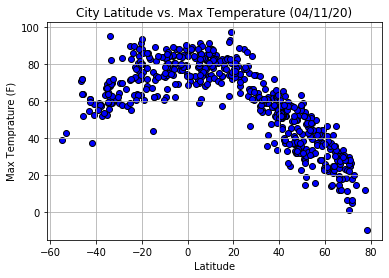

In [6]:
# Create a scatter plot for latitude and temprature
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker = "o", facecolor = "blue", edgecolor = "black")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temprature (F)")
plt.grid()
plt.show()

#### Latitude vs. Humidity Plot

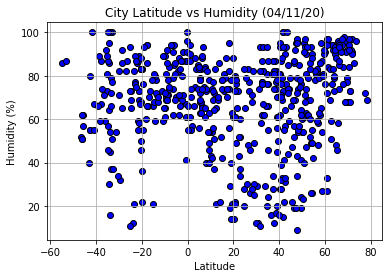

In [7]:
# Create a scatter plot for latitude and humidity
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker = "o", facecolor = "blue", edgecolor = "black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (%s)" % time.strftime("%x"))
plt.grid()
plt.show()

#### Latitude vs. Cloudiness Plot

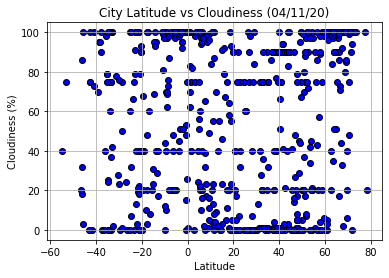

In [8]:
# Create a scatter plot for latitude and cloudiness
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker = "o", facecolor = "blue", edgecolor = "black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (%s)" % time.strftime("%x"))
plt.grid()
plt.show()

#### Latitude vs. Wind Speed Plot

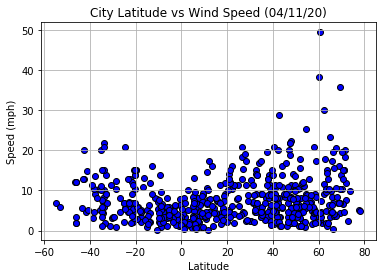

In [9]:
# Create a scatter plot for latitude and wind speed
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker = "o", facecolor = "blue", edgecolor = "black")
plt.xlabel("Latitude")
plt.ylabel("Speed (mph)")
plt.title("City Latitude vs Wind Speed (%s)" % time.strftime("%x"))
plt.grid()
plt.show()

## Linear Regression

In [10]:
# OPTIONAL: Create a function to create Linear Regression plots

In [11]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_df.loc[weather_df["Lat"] > 0.01]
southern_hemisphere = weather_df.loc[weather_df["Lat"] < -0.01]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

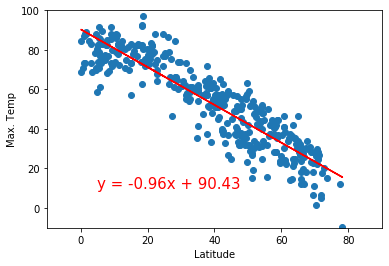

In [12]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "red")
plt.annotate(line_eq, (5, 10), fontsize=15, color = "red")

plt.ylim(-10, 100)
plt.xlim(-10, 90)

plt.ylabel("Max. Temp")
plt.xlabel("Latitude")
plt.savefig("../output_data/NORTH MAX TEMP VS LAT.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

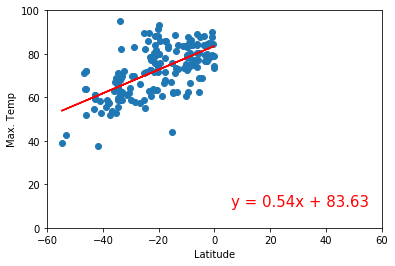

In [13]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6, 10), fontsize = 15, color= "red")

plt.ylim(0, 100)
plt.xlim(-60, 60)

plt.ylabel("Max. Temp")
plt.xlabel("Latitude")
plt.savefig("../output_data/SOUTH MAX TEMP VS LAT.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

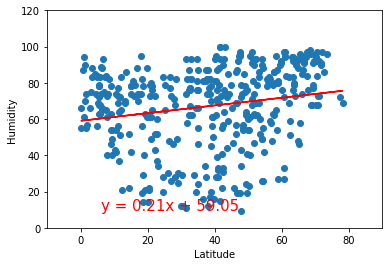

In [14]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6, 10),fontsize = 15,color="red")

plt.ylim(0, 120)
plt.xlim(-10, 90)

plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.savefig("../output_data/NORTH HUM VS LAT.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

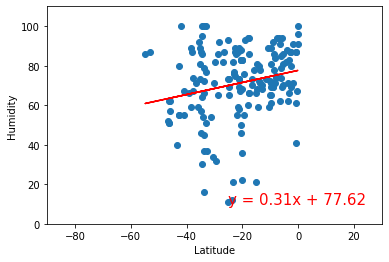

In [15]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-25, 10), fontsize = 15, color = "red")

plt.ylim(0, 110)
plt.xlim(-90, 30)

plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.savefig("../output_data/SOUTH HUM VS LAT.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

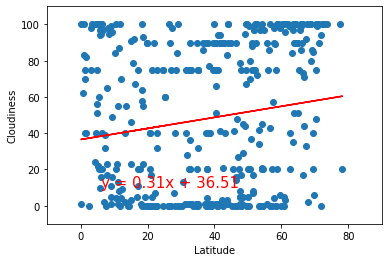

In [16]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6, 10), fontsize = 15, color = "red")

plt.ylim(-10, 110)
plt.xlim(-10, 90)

plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.savefig("../output_data/NORTH CLOUD VS LAT.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

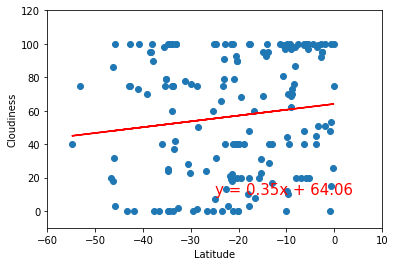

In [17]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-25, 10),fontsize = 15,color = "red")

plt.ylim(-10, 120)
plt.xlim(-60, 10)

plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.savefig("../output_data/SOUTH CLOUD VS LAT.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

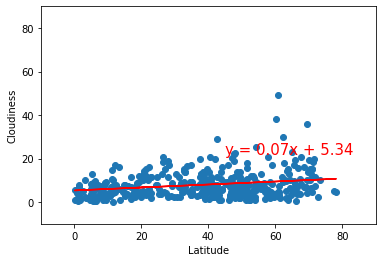

In [18]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (45, 22), fontsize = 15, color = "red")

plt.ylim(-10, 90)
plt.xlim(-10, 90)

plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.savefig("../output_data/NORTH WIND VS LAT.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

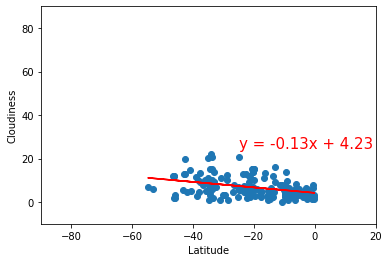

In [19]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-25, 25), fontsize = 15,color = "red")

plt.ylim(-10, 90)
plt.xlim(-90, 20)

plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.savefig("../output_data/SOUTH WIND VS LAT.png")
plt.show()